<a href="https://colab.research.google.com/github/harkpun/Netflix-Movie-and-TV-Shows-Clustering/blob/main/Netflix_Movie_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title - Netflix Movie and TV Shows Clustering </u></b>

##### **Project Type**    - Unsupervised (Clustering, Content Based Recommender System)
##### **Contribution**    - Individual




# **Project Summary**

#### <b>In this  project, we are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features
5. At the end build Content Based Recommendation System.

# **GitHub Link**


https://github.com/harkpun/Netflix-Movie-and-TV-Shows-Clustering

# **Problem Statement**
<b>This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

<b>Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.

<b>We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

<b>The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.


# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### **Dataset Loading**

In [2]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/harkpun/Netflix-Movie-and-TV-Shows-Clustering/main/Data/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv')

### **Understanding Data**

In [3]:
# top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
# Dataset Rows & Columns count
print(f'number of rows : {df.shape[0]}  \nnumber of columns : {df.shape[1]}')

number of rows : 7787  
number of columns : 12


In [6]:
# unique values in each column
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### **Attribute Information**
- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# Missing Values Percentage
round(df.isna().sum()/len(df)*100, 2).sort_values(ascending=False).head(5)

director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64

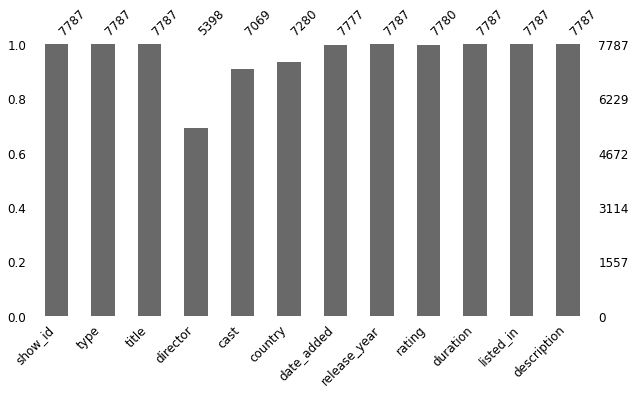

In [11]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, figsize=(10,5), fontsize=12)

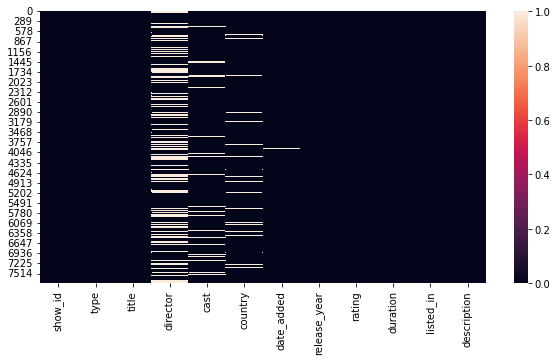

In [12]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isna())

NaN values present in the director, cast, country, date_added and rating column. 

All the data that we have is related to each specific movie. So, we can't impute any null values with using any method. Also we don't want to loose any data since the data size is small for that reason we simply impute nan values with empty space in below procedure analyzing each columns.  

## **2. Understanding Your Variables**

In [13]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'number of unique values in {i} column : {df[i].nunique()}    \nunique values :\n{df[i].unique()}')
  print('='*200)

number of unique values in show_id column : 7787    
unique values :
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
number of unique values in type column : 2    
unique values :
['TV Show' 'Movie']
number of unique values in title column : 7787    
unique values :
['3%' '07:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
number of unique values in director column : 4049    
unique values :
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
number of unique values in cast column : 6831    
unique values :
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, S

## **3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### **Type**

In [16]:
df['type'].nunique()

2

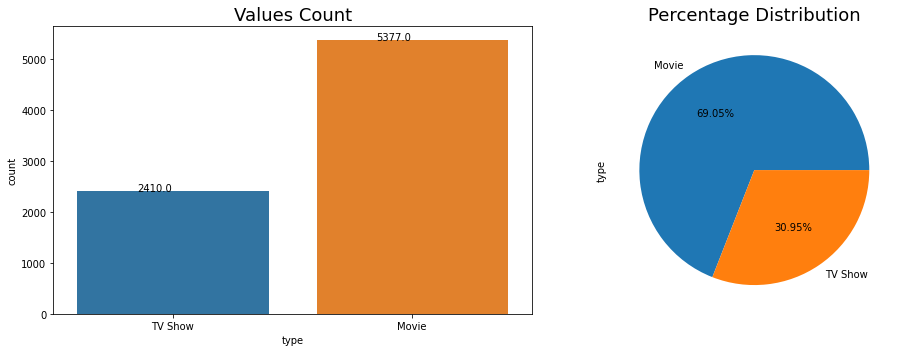

In [17]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# coutplot
graph = sns.countplot(x=df['type'], ax=ax[0])
graph.set_title('Values Count', size=18)
# adding value count on the top of bar
for p in graph.patches:
   graph.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1])
plt.title('Percentage Distribution', size=18)

plt.tight_layout()
plt.show()

**Obesrvation:** 69% of data belong from Movie class and 31% of data belong from TV shows 

#### **Title**

In [18]:
df['title'].nunique()

7787

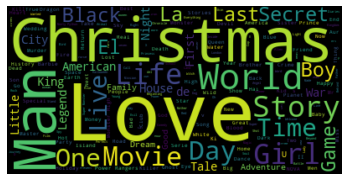

In [19]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

**Obesrvation:** word like Christmas, Love, World, Man, Story are very comman word which are appear most of the time in movie title column.

#### **Director**

In [20]:
print(f'number of unique classes : {df.director.nunique()}')
print(f'counting null value : {df.director.isna().sum()}')

number of unique classes : 4049
counting null value : 2389


In [21]:
print(f"number of movie directed by director is : { df[df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"number of TV show directed by director is : { df[df['type']=='Movie']['director'].value_counts().sum()}")

number of movie directed by director is : 184
number of TV show directed by director is : 5214


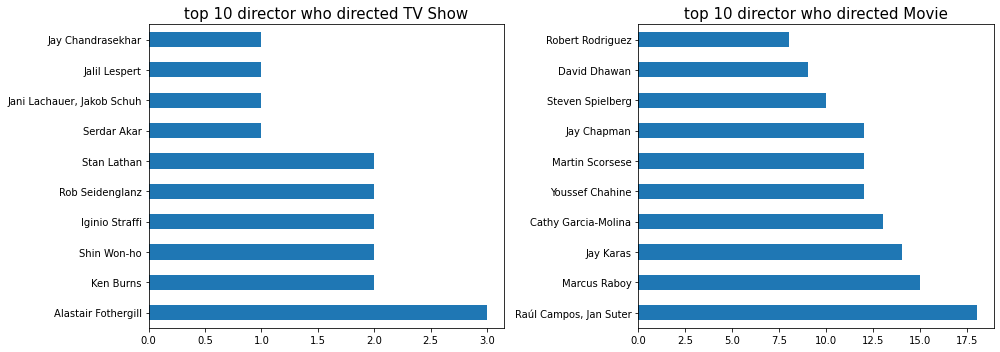

In [22]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 director who directed TV show
show = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=15)

# top 10 director who directed movie
movie = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=15)

plt.tight_layout()
plt.show()

**Obesrvation:**  
1. Alstair Fothergill directed highest shows in datalist which is 3.
2. Raul Campos and Jan Suter together have directed 18 movies, higher than anyone in the dataset.

#### **Cast**

In [23]:
# number of unique values
df.cast.nunique()

6831

In [24]:
# number of nan values
df.cast.isna().sum()

718

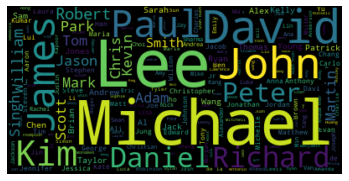

In [25]:
cast = df.cast.fillna('')

# text documents
text = " ".join(str(word) for word in cast)

# create the word cloud
wordcloud = WordCloud().generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

#### **Country**

In [26]:
df['country'].nunique()

681

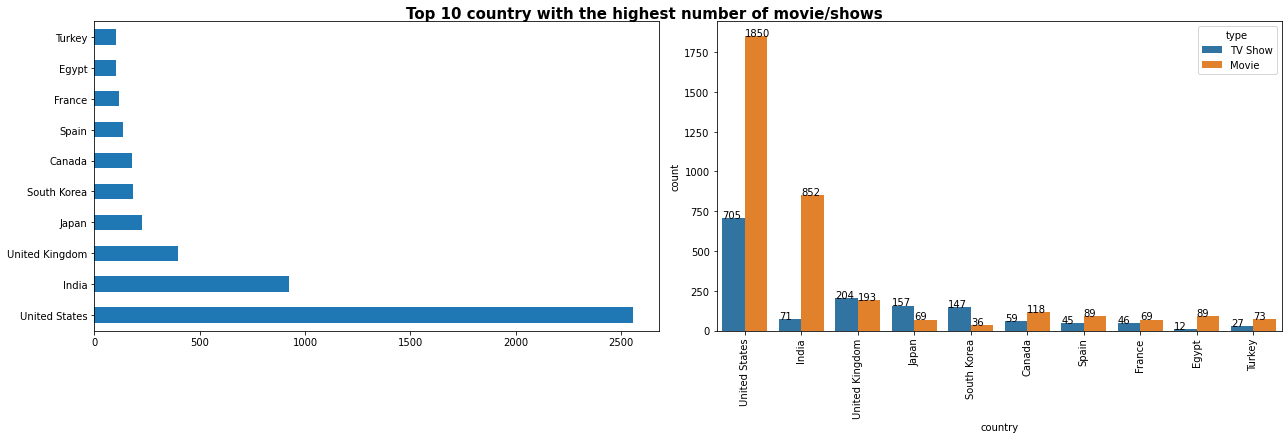

In [27]:
fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0]) #sns.countplot(x="country", data=df, order=df['country'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

**Observation :** The highest number of movies / TV shows were based out of the US, followed by India and UK.

In [28]:
# % share of movies / tv shows by top 10 countries
df['country'].value_counts().nlargest(10).sum()/len(df)*100

63.06664954411198

- The top 10 countries together account for about 63% of all movies and TV shows in the dataset.

### **Release Year**

In [29]:
df['release_year'].nunique()

73

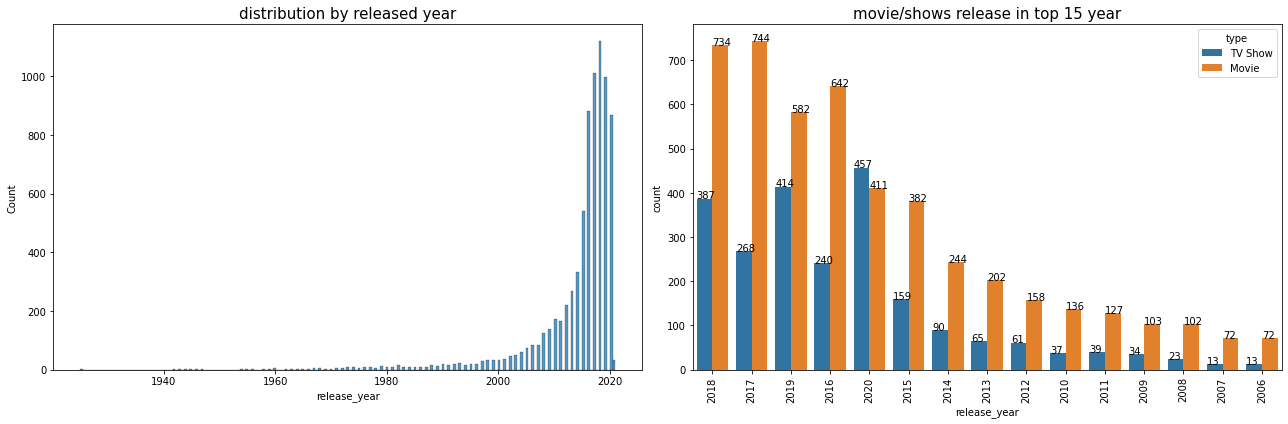

In [30]:
fig,ax = plt.subplots(1,2, figsize=(18,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('movie/shows release in top 15 year', size=15)
plt.xticks(rotation=90)
for p in count.patches:  #adding value count on the top of bar
   count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

**Obesrvation :** 
1. Netflix has greater number of new movies / TV shows than the old ones.
2. Highest number of movie/shows are relesed in netflix in between 2015-2020 and highest number of count belong from 2018 year.

### **Rating**

In [31]:
# unique clas  present in rating column
df.rating.nunique()

14

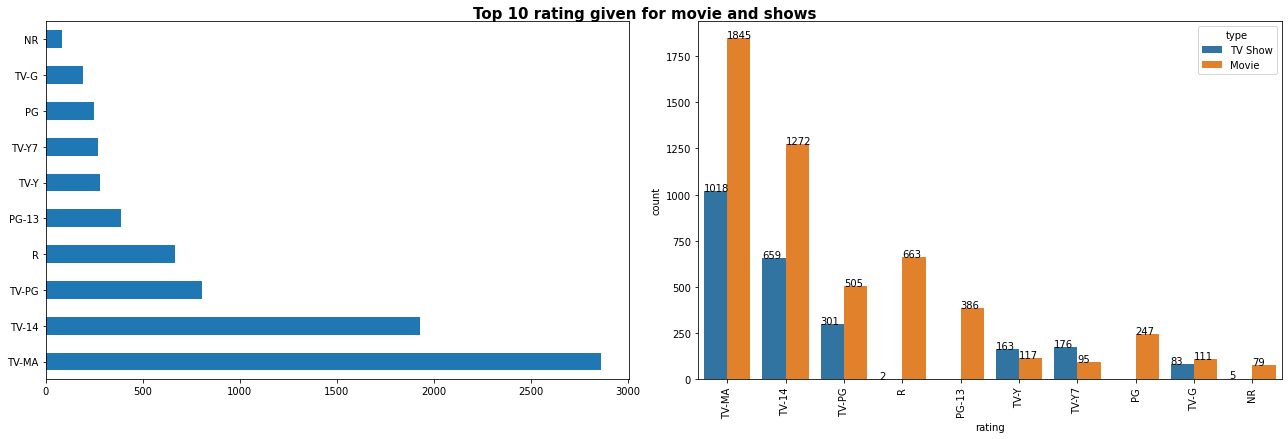

In [32]:
fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', size=15, y=1.01)

# univariate analysis
df.rating.value_counts()[:10].plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

### **Listed In (Geners)**

In [33]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres[:10]

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,704
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


In [34]:
# number of genres present in dataset 
len(genres)

42

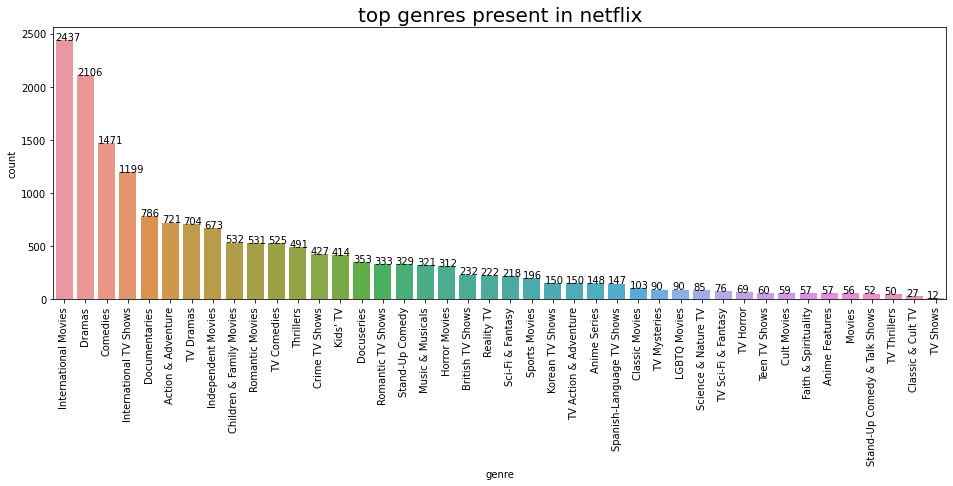

In [35]:
# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data=genres)
graph.set_title('top genres present in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

### **Description**

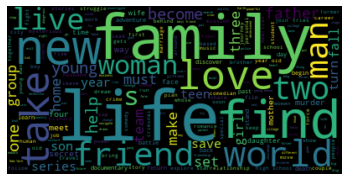

In [36]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

**Observation :** Most of the comman words present in description column are family, find, life, love, new, world, friend.

## **4. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [37]:
# Missing Data %
round(df.isna().sum()/len(df)*100, 2).sort_values(ascending=False)

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

- The missing values in the director, cast, and country attributes can be replaced with 'empty string'
- Small amount of null value percentage present in rating and date_added column, if we drop these nan values it will not affect that much while building the model. So, we simply drop the nan value present in rating and date_added columns.

In [38]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [39]:
# checking for null values after treating them.
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 2. Handling Outliers

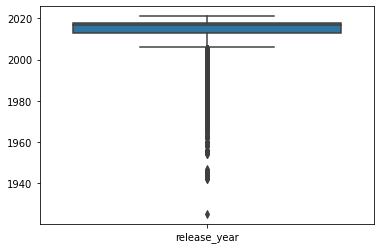

In [40]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df)

## **5. Modelling Approach**
1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.
3. Stemming to generate a meaningful word out of corpus of words.
4. Tokenization of corpus and Word vectorization
5. Dimensionality reduction
6. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.


### 1. We will cluster the movie/shows on Netflix based on the following attributes:

- Director
- Cast
- Country
- Rating
- Listed in (genres)
- Description

In [41]:
# creating tags column using all text column which one is used for model building purpose.
df['tags'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country'] + df['director']

In [42]:
df.tags[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil '

- We have successfully added all the necessary data into a single column.

### 2. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### **Removing Stopwords and Lower Casing.**

In [43]:
# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [44]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [45]:
# applying stopwords function.
df['tags'] = df['tags'].apply(stopwords)

In [46]:
df.tags[0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-majoão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibrazil'

- We have successfully removed all the stopwords and converted the corpus to lowercase.

#### **Removing Punctuations**

In [47]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [48]:
# applying remove_punctuation function
df['tags'] = df['tags'].apply(remove_punctuation)

In [49]:
df.tags[0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi  fantasytvmajoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

- We have successfully remove all the punctuation marks from the corpus.

### 3. Stemming 
**Used SnowballStemmerto generate a meaningful word out of corpus of words.**

In [50]:
from nltk.stem.snowball import SnowballStemmer

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [51]:
# appying stemming function
df['tags'] = df['tags'].apply(stemming)

In [52]:
df.tags[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

- We have stemming the corpus.

## 4. Text Vectorization

We can vectorize the corpus using **TFIDF vectorizer**, where TFIDF stands for - **Term Frequency Inverse Document Frequency**.

### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

### IDF(t) = $log_e(\frac{Total\  number \ of \ documents}{ Number \  of \ documents \  with \  term \ t \ in \ it })$

In [53]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['tags'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [54]:
print(len(dictionary)) #number of independet features created from "tags" columns ---> max_features=10000
print(dictionary)

10000
dict_items([('futur', 3220), ('elit', 2618), ('inhabit', 4144), ('island', 4246), ('paradis', 6704), ('far', 2922), ('crowd', 1916), ('slum', 8297), ('chanc', 1439), ('join', 4464), ('save', 7859), ('tv', 9288), ('drama', 2436), ('scifi', 7908), ('miguel', 5835), ('bianca', 948), ('michel', 5816), ('oliveira', 6531), ('rafael', 7192), ('lozano', 5279), ('vivian', 9543), ('porto', 6984), ('mel', 5747), ('sergio', 7998), ('celso', 1397), ('devast', 2213), ('earthquak', 2531), ('hit', 3876), ('mexico', 5805), ('citi', 1580), ('trap', 9205), ('survivor', 8784), ('walk', 9578), ('life', 5132), ('wait', 9574), ('rescu', 7443), ('tri', 9225), ('desper', 2198), ('stay', 8611), ('alivedrama', 312), ('intern', 4183), ('bichir', 952), ('héctor', 4029), ('oscar', 6603), ('serrano', 8011), ('ortiz', 6598), ('carmen', 1331), ('armi', 534), ('recruit', 7354), ('dead', 2083), ('fellow', 2983), ('soldier', 8352), ('forc', 3105), ('confront', 1761), ('terrifi', 8982), ('secret', 7939), ('haunt', 3

In [55]:
# convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


### 5. Dimesionality Reduction

In [56]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA()

Text(0, 0.5, 'cumulative explained variance')

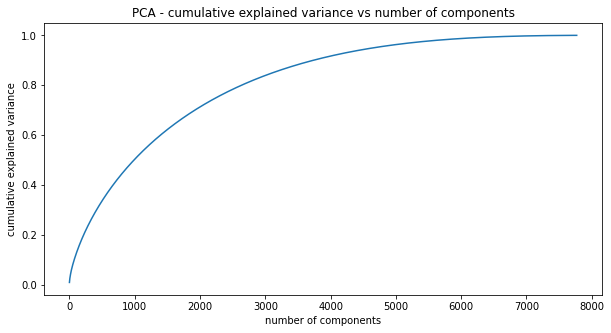

In [57]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

- We find that 100% of the variance is explained by about ~7500 components.
- Also, around more than 80% of the variance is explained just by 3000 components.
- Hence to simplify the model, and reduce dimensionality, we can take the top 3000 components, which will still be able to capture more than 80% of variance.

In [58]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [59]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7770, 3000)

## 6. Clusters implementation

### **6.1. K-Means Clustering**


Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

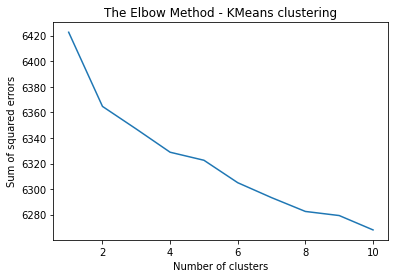

In [60]:
'''Elbow method to find the optimal value of k'''

# Initialize a list to store the sum of squared errors for each value of k
SSE = []

for k in range(1, 11):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 11), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.

For k=2, the silhouette score is 0.006
For k=3, the silhouette score is 0.006
For k=4, the silhouette score is 0.003
For k=5, the silhouette score is 0.003
For k=6, the silhouette score is 0.003
For k=7, the silhouette score is 0.003
For k=8, the silhouette score is 0.004
For k=9, the silhouette score is 0.005
For k=10, the silhouette score is 0.004


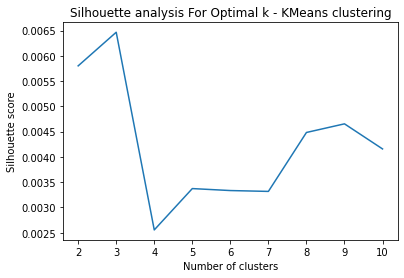

In [66]:
from sklearn.metrics import silhouette_score

'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 11):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.predict(X)
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)
  
# Plot the Silhouette analysis
plt.plot(range(2,11), silhouette_avg)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

- **The highest Silhouette score is obtained for 6 clusters.**

Building 4 clusters using the k-means clustering algorithm:

In [67]:
# Clustering the data into 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=33)

In [68]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6328.816421236538, 0.0027563574024166548)


In [71]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [74]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags,kmeans_cluster
6962,s6960,Movie,The Unborn Child,Poj Arnon,"Somchai Kemglad, Pitchanart Sakakorn, Chinarad...",Thailand,"July 30, 2018",2011,TV-MA,93 min,"Horror Movies, International Movies",A couple and their young daughter are haunted ...,coupl young daughter haunt paranorm malici pre...,1
2610,s2609,Movie,Happy Anniversary,Jared Stern,"Noël Wells, Ben Schwartz, Joe Pantoliano, Anni...",United States,"March 30, 2018",2018,TV-MA,78 min,"Comedies, Romantic Movies",A quirky couple spends their three-year dating...,quirki coupl spend threeyear date anniversari ...,3
2950,s2928,Movie,I'm Thinking of Ending Things,Charlie Kaufman,"Jessie Buckley, Jesse Plemons, Toni Collette, ...",United States,"September 4, 2020",2020,R,135 min,"Dramas, Independent Movies",Nothing is as it seems when a woman experienci...,noth seem woman experienc misgiv new boyfriend...,3
4612,s4611,Movie,Omar and Salma 3,Mohamed Samy,"Tamer Hosny, Mai Ezzidine, Ezzat Abou Aouf, La...",Egypt,"April 25, 2019",2012,TV-MA,97 min,"Comedies, International Movies, Romantic Movies","In this second sequel of the trilogy, marital ...",second sequel trilog marit strife brew omar pu...,1
1481,s1480,TV Show,Conan Without Borders,,,United States,"December 31, 2018",2018,TV-14,1 Season,"Docuseries, TV Comedies",Late-night talk show host Conan O'Brien hits t...,latenight talk show host conan obrien hit road...,3


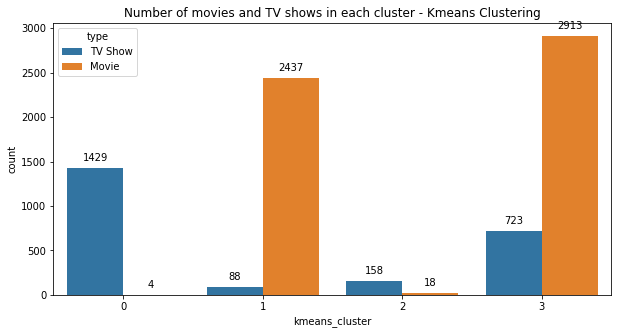

In [73]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- **Successfully built 6 clusters using the k-means clustering algorithm.**

### **5.1.1. Building wordclouds for different clusters built**

In [113]:
def kmeans_worldcloud(cluster_number, column_name):
  
  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['kmeans_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster']==cluster_number]
  
  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

### **Word Cloud on Description col for different cluster**

cluster 0


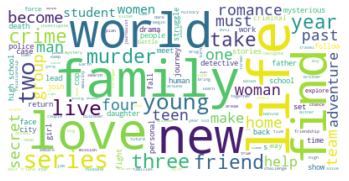

cluster 1


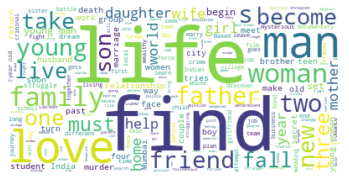

cluster 2


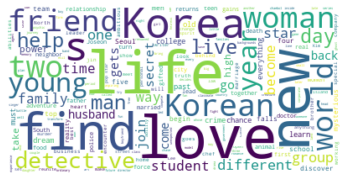

cluster 3


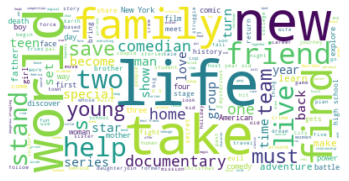

In [117]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')

cluster 0


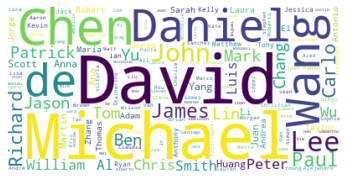

cluster 1


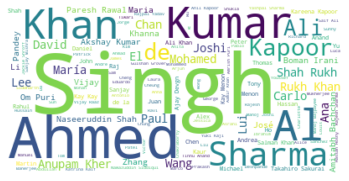

cluster 2


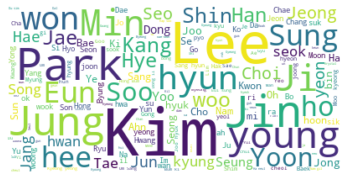

cluster 3


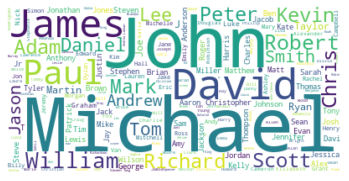

In [118]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'cast')

cluster 0


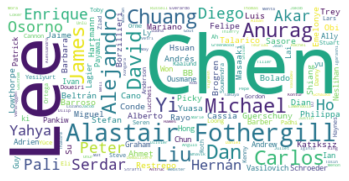

cluster 1


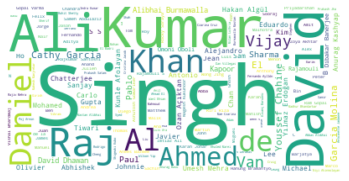

cluster 2


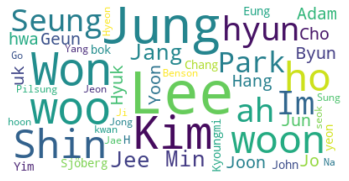

cluster 3


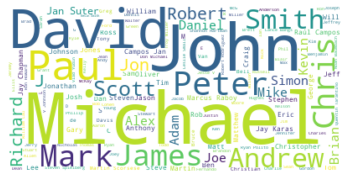

In [119]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'director')

cluster 0


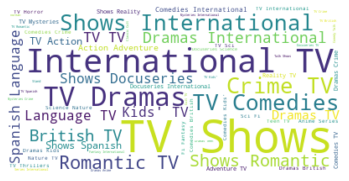

cluster 1


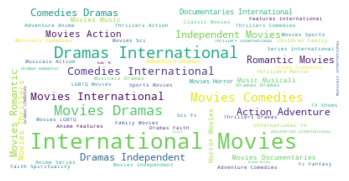

cluster 2


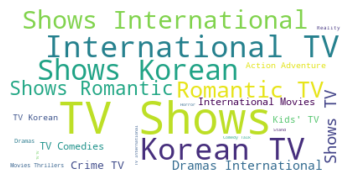

cluster 3


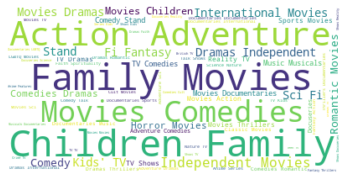

In [120]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'listed_in')

cluster 0


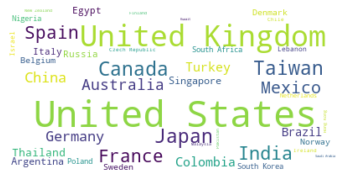

cluster 1


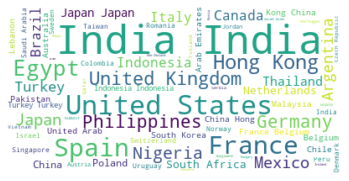

cluster 2


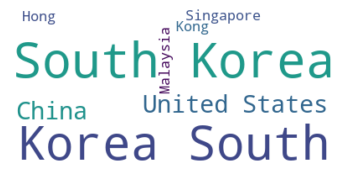

cluster 3


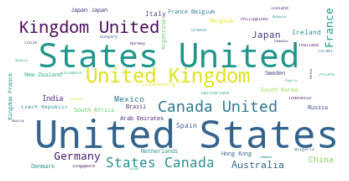

In [121]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'country')

cluster 0


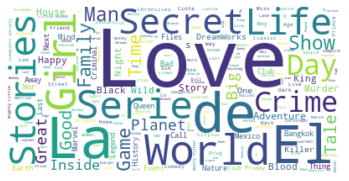

cluster 1


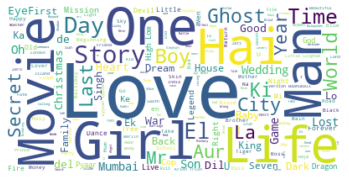

cluster 2


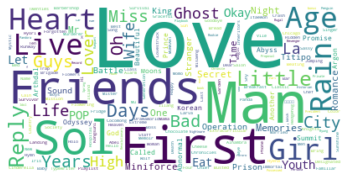

cluster 3


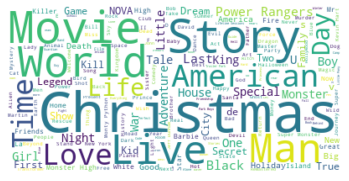

In [122]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')

In [123]:
df[df['kmeans_cluster'] == 0][['type','title','director','cast','country','rating','listed_in','description']]

,type,title,director,cast,country,rating,listed_in,description
0,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,TV Show,1983,,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",TV-MA,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,TV Show,1994,Diego Enrique Osorno,,Mexico,TV-MA,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,TV Show,Feb-09,,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",,TV-14,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...
7766,TV Show,Zig & Sharko,,,France,TV-Y7,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t..."
7767,TV Show,Zindagi Gulzar Hai,,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,TV-PG,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7777,TV Show,Zombie Dumb,,,,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,TV Show,Zona Rosa,,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,TV-MA,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [124]:
df[df['kmeans_cluster'] == 1][['type','title','director','cast','country','rating','listed_in','description']]

,type,title,director,cast,country,rating,listed_in,description
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,TV-MA,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
8,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,TV-14,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,TV-MA,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
...,...,...,...,...,...,...,...,...
7775,TV Show,Zoids Wild,,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,TV-Y7,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7776,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,PG,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp..."
7780,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,TV-MA,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,TV-14,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [125]:
df[df['kmeans_cluster'] == 2][['type','title','director','cast','country','rating','listed_in','description']]

,type,title,director,cast,country,rating,listed_in,description
37,TV Show,100 Days My Prince,,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,TV-14,"International TV Shows, Romantic TV Shows, TV ...","Upon losing his memory, a crown prince encount..."
47,TV Show,12 Years Promise,,"So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...",South Korea,TV-14,"International TV Shows, Korean TV Shows, Roman...",A pregnant teen is forced by her family to lea...
77,Movie,26 Years,Geun-hyun Cho,"Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...",South Korea,TV-MA,"Dramas, International Movies, Thrillers",Twenty-six years after the 1980 massacre at Gw...
81,TV Show,28 Moons,,"Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Ge...",South Korea,TV-PG,"International TV Shows, Korean TV Shows, Roman...",When her fiancé acts strangely upon receiving ...
178,TV Show,A Korean Odyssey,,"Lee Seung-gi, Cha Seung-won, Oh Yeon-seo, Lee ...",South Korea,TV-MA,"International TV Shows, Korean TV Shows, Roman...",A self-serving mythical creature's bid for inv...
...,...,...,...,...,...,...,...,...
7490,TV Show,Was It Love?,,"Song Ji-hyo, Son Ho-jun, Song Jong-ho, Koo Ja-...",South Korea,TV-14,"International TV Shows, Korean TV Shows, Roman...",When four very different men appear in her lif...
7559,TV Show,What in the World Happened?,,"Eun-mi Go, Jaehyo, Eun-Hyung Jo, Ha-yeon Kim, ...",South Korea,TV-14,"International TV Shows, Korean TV Shows, Roman...",A happy secret romance between a 40-year-old w...
7587,TV Show,When the Camellia Blooms,,"Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...",South Korea,TV-14,"International TV Shows, Korean TV Shows, Roman...",Dongbaek is a single mother. When a potential ...
7605,TV Show,White Nights,,"Yo-Won Lee, Goo Jin, U-ie, Hae-in Jung, Gook-h...",South Korea,TV-14,"International TV Shows, Korean TV Shows, TV Dr...","A coldhearted heiress, a man from her past and..."


In [128]:
df[df['kmeans_cluster'] == 3][['type','title','director','cast','country','rating','listed_in','description']]

,type,title,director,cast,country,rating,listed_in,description
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...
7,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,R,Dramas,After one of his high school students attacks ...
10,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,TV-MA,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,R,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...
...,...,...,...,...,...,...,...,...
7774,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
7778,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7781,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",TV-MA,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


- 0: "Kids, International TV Shows"
- 1: "International Movies, Horror Movie, India"
- 2: "TV Shows, International TV Shows, South-Korea"
- 3: "Darams, Documentaries, Sci-Fi, United States" <b>

## **Content based recommender system:**

- We can build a simple content based recommender system based on the similarity of the shows.
- If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
- To get the similarity score of the shows, we can use cosine similarity.
- The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.

In [160]:
# taking tags column show_id, title, tags for building recommandation system
recommender_df = df.drop(columns=['director', 'cast', 'listed_in', 'description', 'rating', 'country', 'type', 'release_year', 'date_added', 'duration', 'kmeans_cluster'])

In [198]:
recommender_df.head(5)

,show_id,title,tags
0,s1,3%,futur elit inhabit island paradis far crowd sl...
1,s2,07:19,devast earthquak hit mexico citi trap survivor...
2,s3,23:59,armi recruit found dead fellow soldier forc co...
3,s4,9,postapocalypt world ragdol robot hide fear dan...
4,s5,21,brilliant group student becom cardcount expert...


In [174]:
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [200]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.08883637, 0.03435625, ..., 0.        , 0.03692332,
        0.        ],
       [0.08883637, 1.        , 0.0037448 , ..., 0.08129791, 0.        ,
        0.        ],
       [0.03435625, 0.0037448 , 1.        , ..., 0.01307962, 0.        ,
        0.        ],
       ...,
       [0.        , 0.08129791, 0.01307962, ..., 1.        , 0.        ,
        0.06354285],
       [0.03692332, 0.        , 0.        , ..., 0.        , 1.        ,
        0.0489681 ],
       [0.        , 0.        , 0.        , ..., 0.06354285, 0.0489681 ,
        1.        ]])

In [201]:
def recommend(movie):
    index = recommender_df[recommender_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)
        
        # print(f'Title : {df.iloc[i[0]].title} \nTags : {df.iloc[i[0]].tags} ')
        # print('='*100)

In [202]:
recommend('Zero')

Raees
Phantom
Paan Singh Tomar
Zindagi Na Milegi Dobara
Shabd
Rajma Chawal
Bhangra Paa Le
Jab Harry Met Sejal
Burlesque: Heart of the Glitter Tribe
Manorama Six Feet Under


In [203]:
recommend('Stranger Things')

Beyond Stranger Things
Sleepless Society: Nyctophobia
Anjaan: Special Crimes Unit
The 4400
The OA
The Umbrella Academy
Good Witch
Sakho & Mangane
Trollhunters
Equilibrium
